In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # pattern searching
import seaborn as sns # statistical plots
import matplotlib as mpl
import matplotlib.pyplot as plt # figures, axes
from matplotlib.patches import Patch # Artist manipulation
from scipy import stats # statistics
from datetime import datetime as dt #datetime manipulatin
%matplotlib inline


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## First view of the data 

In [2]:
pd.set_option('display.max_columns', 100)
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')
SalePrice = df_train['SalePrice']
df_train.drop('SalePrice', axis=1, inplace=True, errors='ignore')
df_train.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml


## A DataFrame with column info and description
#### This DataFrame can be used inspect the incorrect datatypes and missing values 

In [3]:
txt = open('../input/house-prices-advanced-regression-techniques/data_description.txt', 'r')
lines = txt.readlines()

description=[]
row=None
for line in lines:
    if len(re.findall(r"^\S.*:.*", line, re.DOTALL)) is not 0:
        if row is None:
            row=line
        else:
            description.append(row)
            row=line
    else:
        if line is lines[-1]:
            row+=line
            description.append(row)
        else:
            row+=line
            
df_info = pd.DataFrame()
df_info['dtype'] = df_train.dtypes
df_info['nullValues'] = df_train.isnull().sum()
df_info['naValues'] = df_train.isna().sum()
df_info['columnDesc'] = description
df_info.to_csv('column_desc.csv')
df_info.head(20)

,dtype,nullValues,naValues,columnDesc
MSSubClass,int64,0,0,MSSubClass: Identifies the type of dwelling in...
MSZoning,object,0,0,MSZoning: Identifies the general zoning classi...
LotFrontage,float64,259,259,LotFrontage: Linear feet of street connected t...
LotArea,int64,0,0,LotArea: Lot size in square feet\n\n
Street,object,0,0,Street: Type of road access to property\n\n ...
Alley,object,1369,1369,Alley: Type of alley access to property\n\n ...
LotShape,object,0,0,LotShape: General shape of property\n\n ...
LandContour,object,0,0,LandContour: Flatness of the property\n\n ...
Utilities,object,0,0,Utilities: Type of utilities available\n\t\t\n...
LotConfig,object,0,0,LotConfig: Lot configuration\n\n Inside\...


## Checking Datatypes

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Changing  Datatypes

In [5]:
##converting the numerical columns into object columns
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(0).astype('int64').astype('object')
df_train['MSSubClass'] = df_train['MSSubClass'].astype('object')
df_train['YearBuilt'] = df_train['YearBuilt'].astype('object', copy=False)
df_train['YearRemodAdd'] = df_train['YearRemodAdd'].astype('object', copy=False)
df_train['MoSold'] = df_train['MoSold'].astype('object', copy=False)
df_train['YrSold'] = df_train['YrSold'].astype('object', copy=False)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Primary Imputation

In [6]:
##MSZoning: Mode MSZoning values sharing same MSSubclass and Neighborhood 
df_train['MSZoning']=df_train.groupby(['MSSubClass', 'Neighborhood'])['MSZoning'].transform(lambda x:x.fillna(x.mode()[0]))

##Lot Features: For missing LotFrontage we use median LotFrontage values of same MSZoning properties
df_train['LotFrontage']=df_train.groupby("MSZoning")['LotFrontage'].transform(lambda x:x.fillna(x.median()))

##Masonry Veneer Features: There is no logical way to impute the Masonry Veneer type and area. The best way will be to be conservative and assume there is no Masonry Veneer
df_train['MasVnrArea'].where(df_train['MasVnrArea'].notna(), 0, inplace=True)
df_train['MasVnrType'].where(df_train['MasVnrType'].notna(), "None", inplace=True)

##Basement Feautres: Whereever the total basement area is zero and other basement features are missing we can impute "NA" values
df_train['BsmtQual'].where(df_train['TotalBsmtSF']!=0, "NA", inplace=True)
df_train['BsmtCond'].where(df_train['TotalBsmtSF']!=0, "NA", inplace=True)
df_train['BsmtExposure'].where(df_train['TotalBsmtSF']!=0, "NA", inplace=True)
df_train['BsmtFinType1'].where(df_train['TotalBsmtSF']!=0, "NA", inplace=True)
df_train['BsmtFinType2'].where(df_train['TotalBsmtSF']!=0, "NA", inplace=True)
df_train['BsmtFullBath'].where(df_train['TotalBsmtSF']!=0, 0.0, inplace=True)
df_train['BsmtHalfBath'].where(df_train['TotalBsmtSF']!=0, 0.0, inplace=True)
df_train['BsmtFinSF1'].where(df_train['TotalBsmtSF']!=0, 0.0, inplace=True)
df_train['BsmtFinSF2'].where(df_train['TotalBsmtSF']!=0, 0.0, inplace=True)
df_train['BsmtUnfSF'].where(df_train['TotalBsmtSF']!=0, 0.0, inplace=True)

##BsmtExposure and BsmtFinTyoe2 still have missing values where the basement area is non zero. In that case we impute the mode values
df_train['BsmtExposure']=df_train['BsmtExposure'].transform(lambda x: x.fillna(x.mode()[0]))
df_train['BsmtFinType2']=df_train['BsmtFinType2'].transform(lambda x: x.fillna(x.mode()[0]))

##Garage Features: Whereever the garage area is zero and other garage features are missing we can impute "NA" values
df_train['GarageCond'].where(df_train['GarageArea']!=0, "NA", inplace=True)
df_train['GarageQual'].where(df_train['GarageArea']!=0, "NA", inplace=True)
df_train['GarageFinish'].where(df_train['GarageArea']!=0, "NA", inplace=True)
df_train['GarageType'].where(df_train['GarageArea']!=0, "NA", inplace=True)

##Electrical
df_train['Electrical']=df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

##Fireplace Features
df_train['FireplaceQu'].where(df_train['Fireplaces']!=0, "NA", inplace=True)

##Pool Features
df_train['PoolQC'].where(df_train['PoolArea']!=0, "NA", inplace=True)

##Miscellaneous Features
df_train['MiscFeature'].where(df_train['MiscVal']!=0, "NA", inplace=True)

##Too many missing values in Alley and Fence feature and no logical step to impute. We will drop them. 
df_train.drop(axis=1, columns=['Alley', 'Fence'], errors='ignore', inplace=True)

##Missing values after primary imputation
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   object 
 18  YearRemo

#### Some categorical columns like Fireplace, Garage etc will appear better as a binary ones since what is more important is presence or absence of those amenities than the type of amenities present. Then we can plot them using pie chart

In [7]:
##Creating boolean columns
df_train['HasFireplace'] = np.where(df_train['Fireplaces']==0, 'No', 'Yes')
df_train['HasGarage'] = np.where(df_train['GarageCars']==0, 'No', 'Yes')
df_train['HasBasement'] = np.where(df_train['BsmtQual']=='NA', 'No', 'Yes')
df_train['HasPool'] = np.where(df_train['PoolQC']=='NA', 'No', 'Yes')
df_train['HasAmenities']=np.where(df_train['MiscFeature']=='NA', 'No', 'Yes')

df_train['MoYrSold']= df_train['MoSold'].astype(str) +'-'+ df_train['YrSold'].astype(str)
df_train['MoYrSold'] = pd.to_datetime(df_train['MoYrSold'])
df_train['YearBuilt'] = pd.to_datetime(df_train['YearBuilt'], format="%Y")
df_train['YearRemodAdd'] = pd.to_datetime(df_train['YearRemodAdd'], format="%Y")
df_train['SalePrice']=SalePrice
df_train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasFireplace,HasGarage,HasBasement,HasPool,HasAmenities,MoYrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003-01-01,2003-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,0,2,2008,WD,Normal,No,Yes,Yes,No,No,2008-02-01,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976-01-01,1976-01-01,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,0,5,2007,WD,Normal,Yes,Yes,Yes,No,No,2007-05-01,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001-01-01,2002-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,0,9,2008,WD,Normal,Yes,Yes,Yes,No,No,2008-09-01,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915-01-01,1970-01-01,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,0,2,2006,WD,Abnorml,Yes,Yes,Yes,No,No,2006-02-01,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000-01-01,2000-01-01,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,0,12,2008,WD,Normal,Yes,Yes,Yes,No,No,2008-12-01,250000
6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993-01-01,1995-01-01,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NA,Shed,700,10,2009,WD,Normal,No,Yes,Yes,No,Yes,2009-10-01,143000
7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004-01-01,2005-01-01,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NA,NA,0,8,2007,WD,Normal,Yes,Yes,Yes,No,No,2007-08-01,307000
8,60,RL,72.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973-01-01,1973-01-01,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,Shed,350,11,2009,WD,Normal,Yes,Yes,Yes,No,Yes,2009-11-01,200000
9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931-01-01,1950-01-01,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,

In [8]:
df_train[df_train['LotArea']>=40000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,HasFireplace,HasGarage,HasBasement,HasPool,HasAmenities,MoYrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
54,20,RL,68.0,50271,Pave,IR1,Low,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,9,5,1981-01-01,1987-01-01,Gable,WdShngl,WdShing,Wd Shng,None,0.0,Gd,TA,CBlock,Ex,TA,Gd,GLQ,1810,Unf,0,32,1842,GasA,Gd,Y,SBrkr,1842,0,0,1842,2,0,0,1,0,1,Gd,5,Typ,1,Gd,Attchd,1981,Fin,3,894,TA,TA,Y,857,72,0,0,0,0,NA,NA,0,11,2006,WD,Normal,Yes,Yes,Yes,No,No,2006-11-01,385000
250,50,RL,72.0,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958-01-01,2006-01-01,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,NA,Shed,500,6,2007,WD,Normal,Yes,Yes,Yes,No,Yes,2007-06-01,277000
314,20,RL,150.0,215245,Pave,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965-01-01,1965-01-01,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,NA,NA,0,6,2009,WD,Normal,Yes,Yes,Yes,No,No,2009-06-01,375000
336,190,RL,72.0,164660,Grvl,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965-01-01,1965-01-01,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,NA,Shed,700,8,2008,WD,Normal,Yes,Yes,Yes,No,Yes,2008-08-01,228950
385,60,RL,72.0,53107,Pave,IR2,Low,AllPub,Corner,Mod,ClearCr,Feedr,Norm,1Fam,2Story,6,5,1992-01-01,1992-01-01,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,985,Unf,0,595,1580,GasA,Ex,Y,SBrkr,1079,874,0,1953,1,0,2,1,3,1,Gd,9,Typ,2,Fa,Attchd,1992,Fin,2,501,TA,TA,Y,216,231,0,0,0,0,NA,NA,0,6,2007,WD,Normal,Yes,Yes,Yes,No,No,2007-06-01,240000
452,20,RL,62.0,70761,Pave,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975-01-01,1975-01-01,Gable,WdShngl,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655,Unf,0,878,1533,GasA,TA,Y,SBrkr,1533,0,0,1533,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1975,Unf,2,576,TA,TA,Y,200,54,0,0,0,0,NA,NA,0,12,2006,WD,Normal,Yes,Yes,Yes,No,No,2006-12-01,280000
458,20,RL,72.0,53227,Pave,IR1,Low,AllPub,CulDSac,Mod,ClearCr,Norm,Norm,1Fam,1Story,4,6,1954-01-01,1994-01-01,Flat,Tar&Grv,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,BLQ,1116,Unf,0,248,1364,GasA,Ex,Y,SBrkr,1663,0,0,1663,1,0,1,0,2,1,Gd,6,Min1,2,Gd,Attchd,1954,Fin,2,529,TA,TA,Y,224,137,0,0,0,0,NA,NA,0,3,2008,WD,Normal,Yes,Yes,Yes,No,No,2008-03-01,256000
524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007-01-01,2008-01-01,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NA,NA,0,10,2007,New,Partial,Yes,Yes,Yes,No,No,2007-10-01,184750
662,60,RL,52.0,46589,Pave,IR2,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,7,1994-01-01,2005-01-01,Hip,CompShg,VinylSd,VinylS

# Block 1

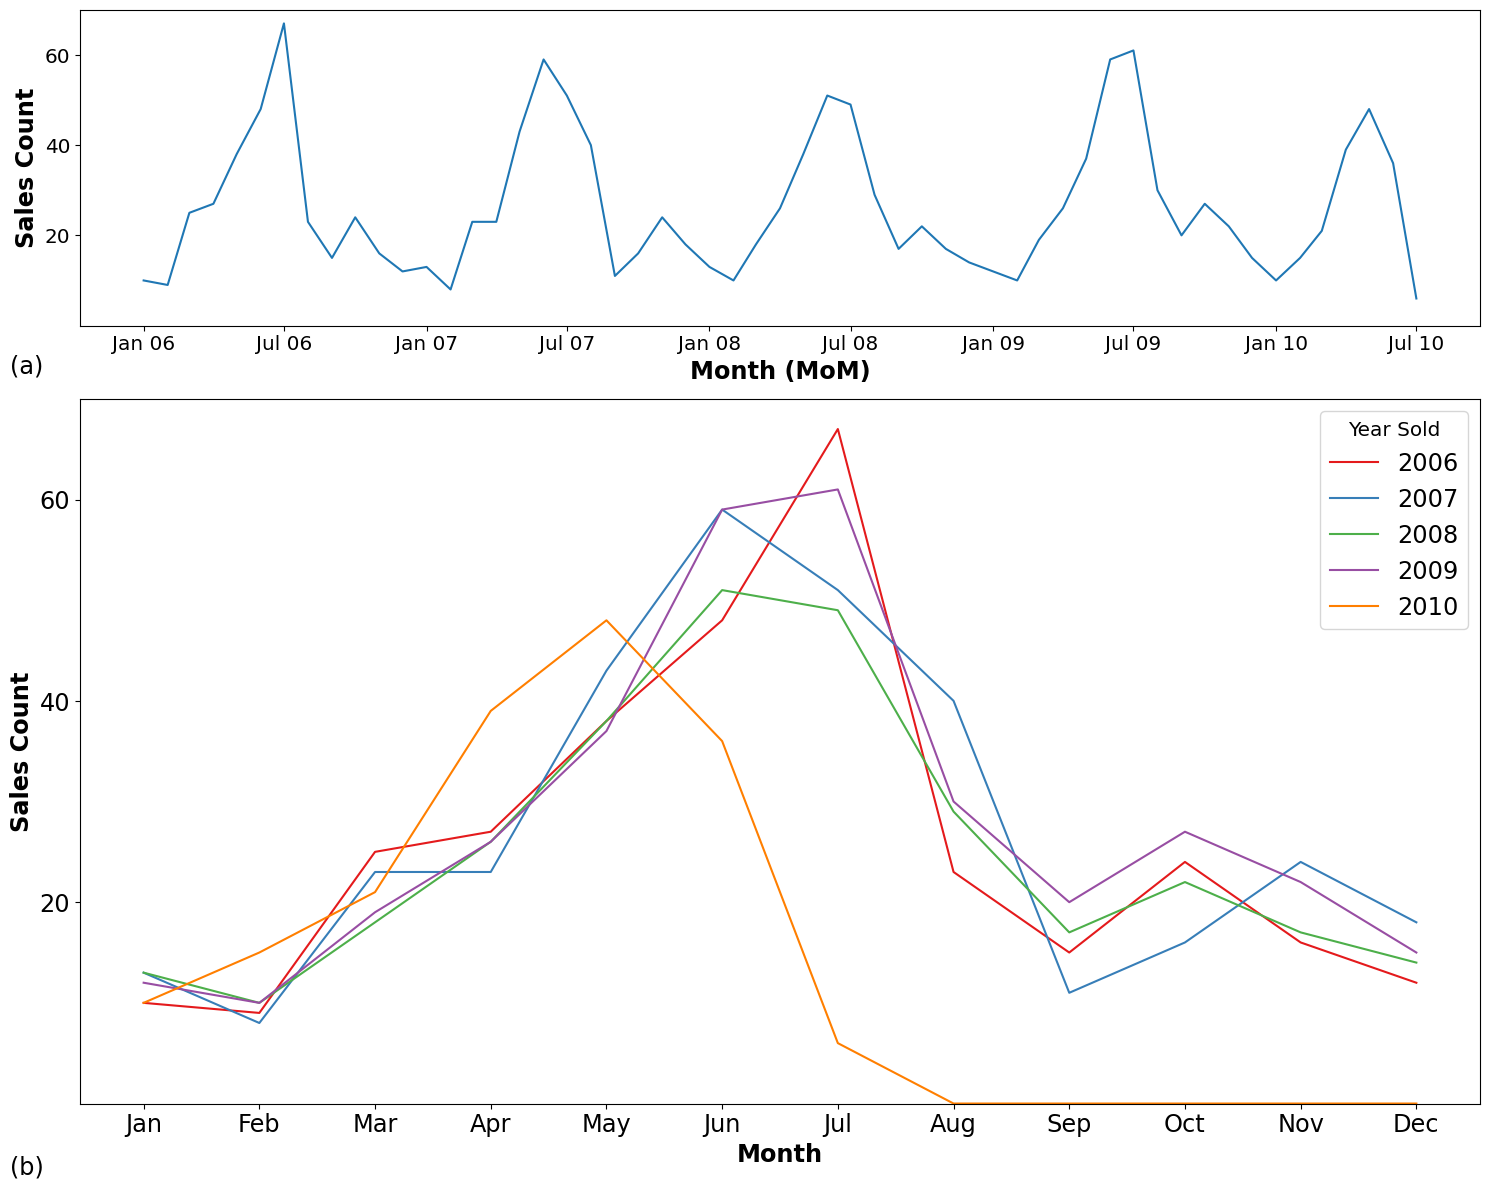

In [9]:
fig=plt.figure(figsize=(15,12), layout='tight', dpi=100)
grid=fig.add_gridspec(3,3)
ax1=fig.add_subplot(grid[0,:])
data=pd.crosstab(df_train['MoYrSold'], columns=1)
sns.lineplot(x=data.index,y=data[1], ax=ax1);
xticklabels=['Jan 06', 'Jul 06', 'Jan 07', 'Jul 07', 'Jan 08', 'Jul 08', 'Jan 09', 'Jul 09', 'Jan 10', 'Jul 10']
yticklabels=[20,40,60]
ax1.set_ylim(0,70)
ax1.set_xticks(ticks=ax1.get_xticks(),labels=xticklabels, fontsize='x-large');
ax1.set_yticks(ticks=yticklabels, labels=yticklabels,fontsize='x-large');
ax1.set_xlabel('Month (MoM)', fontsize='xx-large', fontweight='bold');
ax1.set_ylabel('Sales Count', fontsize='xx-large', fontweight='bold');

ax1.text(-0.05,-0.15, r'(a)',transform=ax1.transAxes, fontsize='xx-large');


plt.rcParams['legend.title_fontsize'] = 'x-large'
ax2=fig.add_subplot(grid[1:,:])
data=pd.crosstab(df_train['MoSold'], columns=df_train['YrSold'])
sns.lineplot(data=data, palette=sns.color_palette("Set1", n_colors=5), dashes=False, ax=ax2);
xticks=[i for i in range(1,13)]
xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
yticks=[20,40,60]
ax2.set_ylim(0,70)
ax2.set_xticks(ticks=xticks,labels=xticklabels, fontsize='xx-large');
ax2.set_yticks(ticks=yticks, labels=yticks,fontsize='xx-large');
ax2.set_xlabel('Month', fontsize='xx-large', fontweight='bold');
ax2.set_ylabel('Sales Count', fontsize='xx-large', fontweight='bold');
ax2.legend(title='Year Sold', fontsize='xx-large');
ax2.text(-0.05,-0.1, r'(b)',transform=ax2.transAxes, fontsize='xx-large');


#fig.savefig('B1.jpeg', dpi=100, bbox_inches='tight')

# Block 2

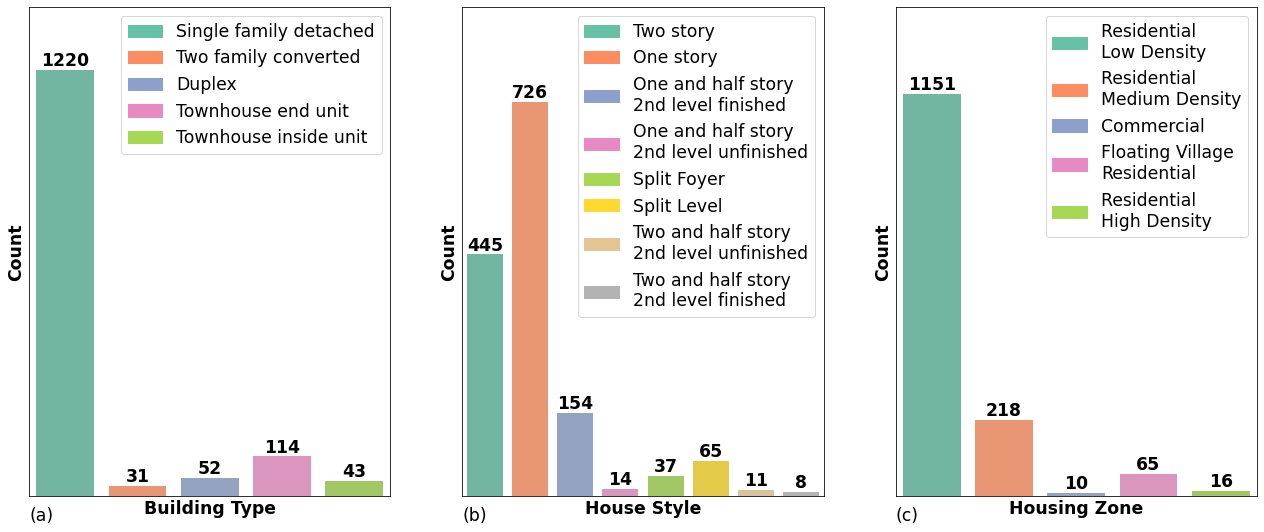

In [10]:
fig, ax = plt.subplots(figsize=(22,9),ncols=3, nrows=1)


## Building Type
palette = sns.color_palette('Set2', n_colors=len(df_train['BldgType'].unique()))
handles=[mpl.patches.Patch(color=i) for i in palette]
labels = ['Single family detached', 
          'Two family converted', 
          'Duplex', 
          'Townhouse end unit', 
          'Townhouse inside unit']
ax[0].tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
sns.countplot(data=df_train, x='BldgType', palette=palette, ax=ax[0]);
for i in ax[0].containers:
    ax[0].bar_label(i, fontsize='xx-large', fontweight='bold');

ax[0].set_xlabel('Building Type',  fontsize='xx-large', fontweight='bold')
ax[0].set_ylabel('Count',  fontsize='xx-large', fontweight='bold')
ax[0].set_ylim(0,1400)
ax[0].legend(handles=handles, labels=labels, fontsize='xx-large');
ax[0].text(0,-0.05, r'(a)',transform=ax[0].transAxes, fontsize='xx-large');


## House Style
palette = sns.color_palette('Set2', n_colors=len(df_train['HouseStyle'].unique()))
handles=[mpl.patches.Patch(color=i) for i in palette]
labels = ['Two story', 
          'One story', 
          'One and half story \n2nd level finished', 
          'One and half story \n2nd level unfinished', 
          'Split Foyer', 
          'Split Level',
          'Two and half story \n2nd level unfinished', 
          'Two and half story \n2nd level finished']
ax[1].tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
sns.countplot(data=df_train, x='HouseStyle', palette=palette, ax=ax[1]);
for i in ax[1].containers:
    ax[1].bar_label(i, fontsize='xx-large', fontweight='bold');

ax[1].set_xlabel('House Style',  fontsize='xx-large', fontweight='bold')
ax[1].set_ylabel('Count',  fontsize='xx-large', fontweight='bold')
ax[1].set_ylim(0,900)
ax[1].legend(handles=handles, labels=labels, fontsize='xx-large');
ax[1].text(0,-0.05, r'(b)',transform=ax[1].transAxes, fontsize='xx-large');


## Housing Zone
palette = sns.color_palette('Set2', n_colors=len(df_train['BldgType'].unique()))
handles=[mpl.patches.Patch(color=i) for i in palette]
labels=['Residential \nLow Density',
        'Residential \nMedium Density',
        'Commercial',
        'Floating Village \nResidential',
        'Residential \nHigh Density']
ax[2].tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False)
sns.countplot(data=df_train, x='MSZoning', palette=palette, ax=ax[2]);
for i in ax[2].containers:
    ax[2].bar_label(i, fontsize='xx-large', fontweight='bold');

ax[2].set_xlabel('Housing Zone',  fontsize='xx-large', fontweight='bold')
ax[2].set_ylabel('Count',  fontsize='xx-large', fontweight='bold')
ax[2].set_ylim(0,1400)
ax[2].legend(handles=handles, labels=labels, fontsize='xx-large');
ax[2].text(0,-0.05, r'(c)',transform=ax[2].transAxes, fontsize='xx-large');

#fig.savefig('B2.jpeg', dpi=100, bbox_inches='tight')

# Block 3

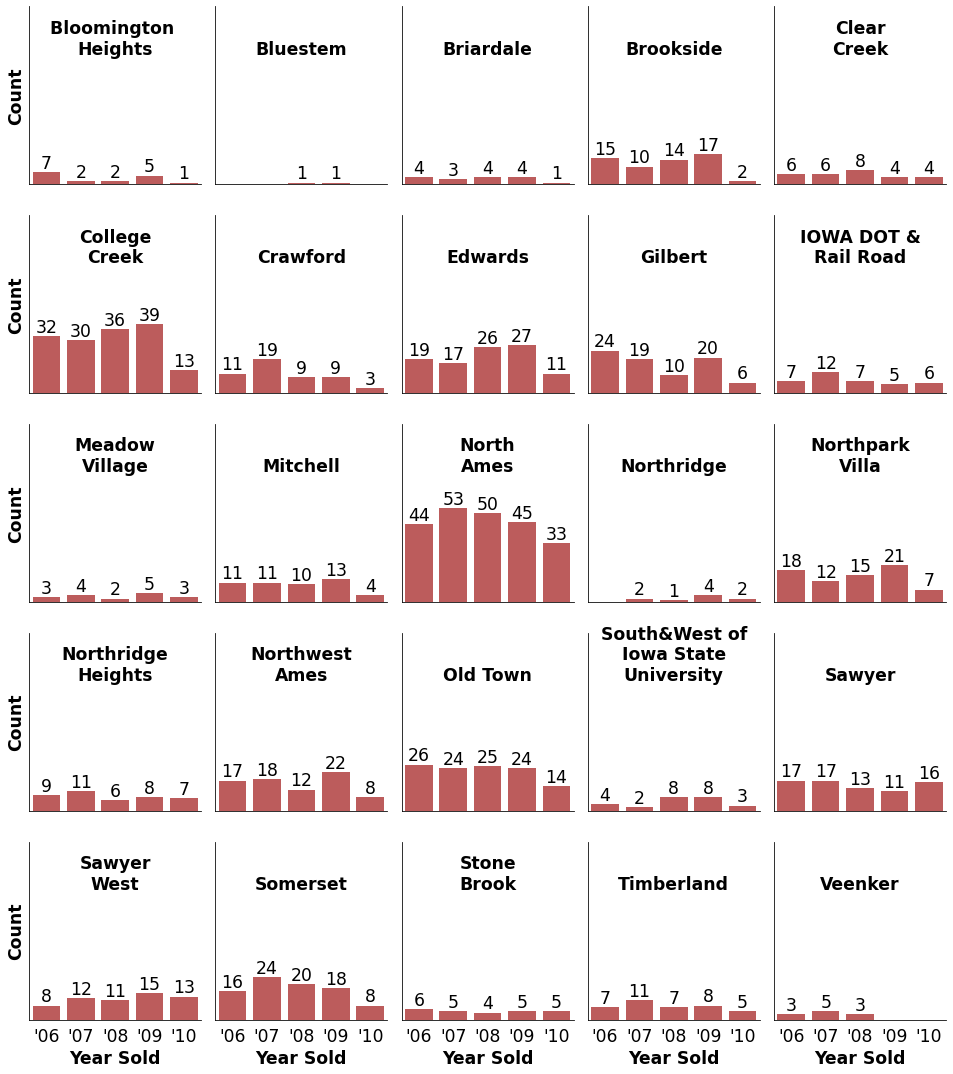

In [11]:
order=np.sort(df_train['Neighborhood'].unique())
fig = sns.catplot(data=df_train, x='YrSold', kind='count', col='Neighborhood', col_wrap=5, col_order=order,color=(0.8,0.3,0.3), height=3, aspect=0.9);
titles=['Bloomington \nHeights',
        'Bluestem', 
        'Briardale',
        'Brookside',
        'Clear\nCreek',
        'College\nCreek',
        'Crawford',
        'Edwards',
        'Gilbert',
        'IOWA DOT &\nRail Road',
        'Meadow\nVillage',
        'Mitchell',
        'North\nAmes',
        'Northridge',
        'Northpark\nVilla',
        'Northridge\nHeights',
        'Northwest\nAmes',
        'Old Town',
        'South&West of\nIowa State\nUniversity',
        'Sawyer',
        'Sawyer\nWest',
        'Somerset',
        'Stone\nBrook',
        'Timberland',
        'Veenker']
xticklabels=['\'06', '\'07', '\'08', '\'09', '\'10']
yticks=[0,20,40,60]
for i in fig.axes:
    i.tick_params(axis='both', which='both', bottom=False, left=False, labelleft=False)
    i.set_xticks(i.get_xticks(), labels=xticklabels, fontsize='xx-large')
    for j in i.containers:
        i.bar_label(j, fontsize='xx-large')
    i.set_ylim(0,100)
    #i.set_xticks(ticks=xticks, labels=xticklabels, fontsize='xx-large')
    i.set_xlabel("Year Sold", fontsize='xx-large', fontstretch='semi-expanded', fontweight='bold');
    i.set_ylabel("Count", fontsize='xx-large', fontweight='bold');
    i.set_title(titles[list(fig.axes).index(i)],fontsize='xx-large', fontweight='bold', x=0.5, y=0.7);

#fig.savefig('B3.jpeg', dpi=1200, bbox_inches='tight')

# Block 4

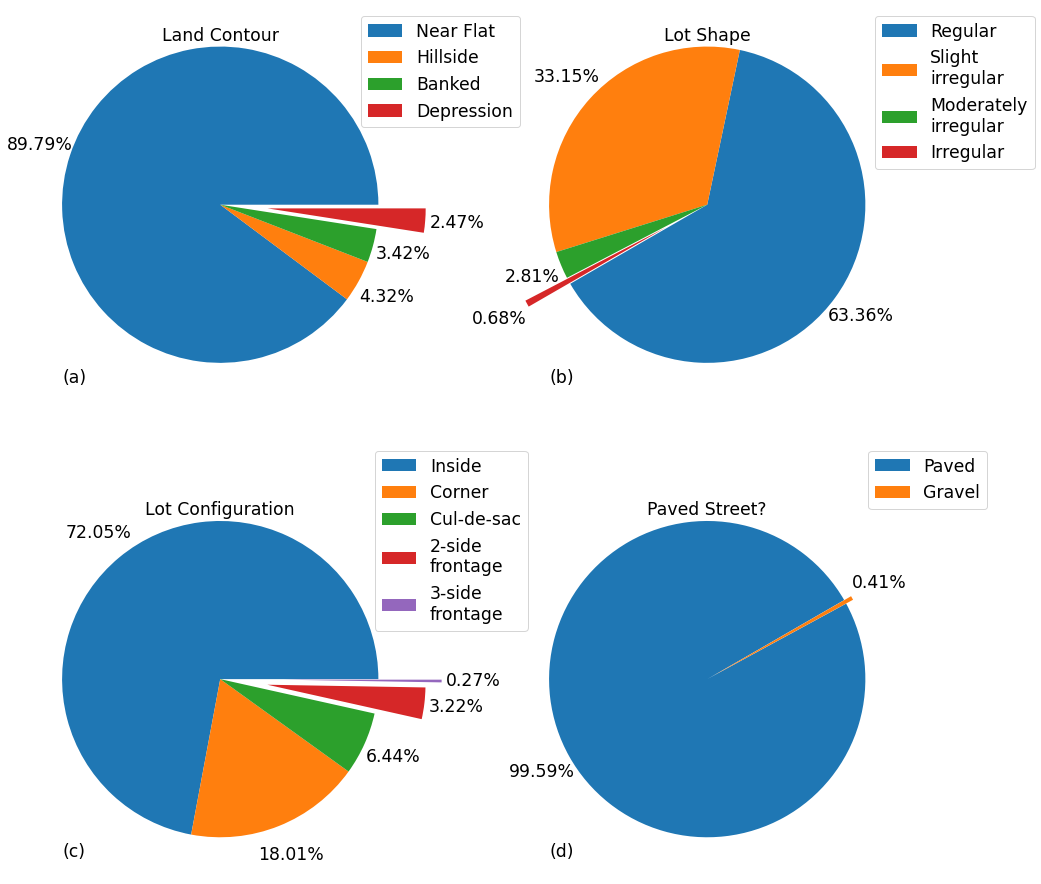

In [12]:
fig, ax = plt.subplots(figsize=(16,16), ncols=2, nrows=2)

##Contour piechart
data=df_train["LandContour"].value_counts().values
labels=df_train["LandContour"].value_counts().index
explode=(0, 0, 0, 0.3)
ax[0,0].pie(data, explode=explode, autopct='%1.2f%%', pctdistance=1.2, startangle=0,textprops={'fontsize':'xx-large'})
ax[0,0].set_title('Land Contour', fontsize='xx-large', y=0.9);
ax[0,0].legend(labels=['Near Flat', 'Hillside', 'Banked', 'Depression'], loc=1, bbox_to_anchor=(1.28,1), fontsize='xx-large');
ax[0,0].text(0.1,0.05,r'(a)',transform=ax[0,0].transAxes, fontsize='xx-large')


##LotShape piechart
data=df_train["LotShape"].value_counts().values
labels=df_train["LotShape"].value_counts().index
explode=(0, 0, 0, 0.3)
ax[0,1].pie(data, explode=explode, autopct='%1.2f%%', pctdistance=1.2, startangle=210,textprops={'fontsize':'xx-large'})
ax[0,1].set_title('Lot Shape', fontsize='xx-large', y=0.9);
ax[0,1].legend(labels=['Regular', 'Slight\nirregular', 'Moderately\nirregular', 'Irregular'], loc=1, bbox_to_anchor=(1.35,1), fontsize='xx-large');
ax[0,1].text(0.1,0.05,r'(b)',transform=ax[0,1].transAxes, fontsize='xx-large')


##LotConfig piechart 
data=df_train["LotConfig"].value_counts().values
labels=df_train["LotConfig"].value_counts().index
explode=(0, 0, 0, 0.3, 0.4)
ax[1,0].pie(data, explode=explode, autopct='%1.2f%%', pctdistance=1.2, startangle=0,textprops={'fontsize':'xx-large'})
ax[1,0].set_title('Lot Configuration', fontsize='xx-large', y=0.9);
ax[1,0].legend(labels=['Inside', 'Corner', 'Cul-de-sac', '2-side\nfrontage', '3-side\nfrontage'], loc=1, bbox_to_anchor=(1.3,1.1), fontsize='xx-large');
ax[1,0].text(0.1,0.05,r'(c)',transform=ax[1,0].transAxes, fontsize='xx-large')


##Street piechart
data=df_train["Street"].value_counts().values
labels=df_train["Street"].value_counts().index
explode=(0, 0.05)
ax[1,1].pie(data, explode=explode, autopct='%1.2f%%', pctdistance=1.2, startangle=30,textprops={'fontsize':'xx-large'})
ax[1,1].set_title('Paved Street?', fontsize='xx-large', y=0.9);
ax[1,1].legend(labels=['Paved', 'Gravel'], loc=1, bbox_to_anchor=(1.23,1.1), fontsize='xx-large');
ax[1,1].text(0.1,0.05,r'(d)',transform=ax[1,1].transAxes, fontsize='xx-large');

#fig.savefig('B4.jpeg', dpi=1200, bbox_inches='tight')

# Block 5

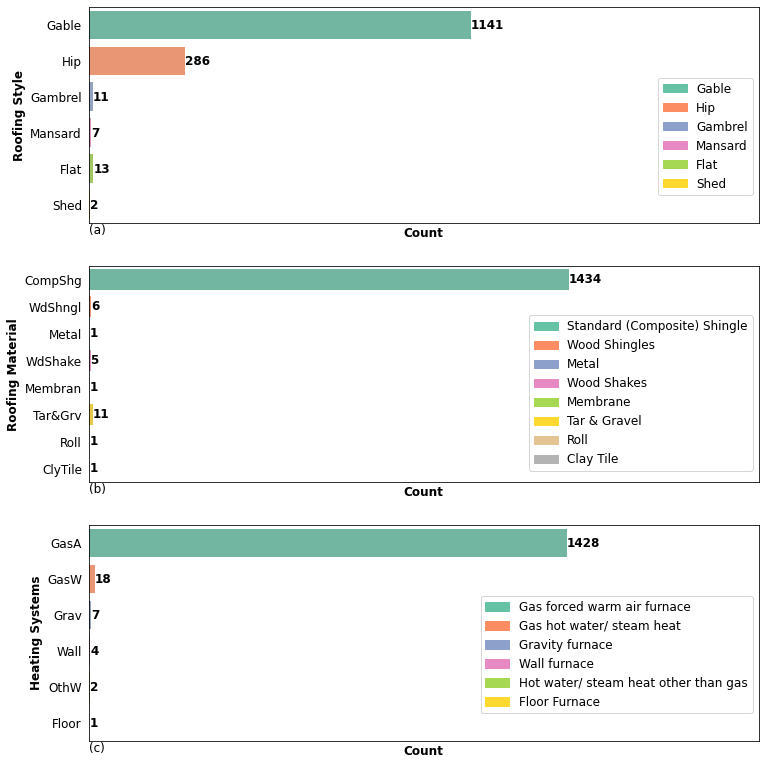

In [13]:
##Note: While plotting multiple seaborn subplots its better to use sns.countplot(ax=ax) than ax = sns.countplot() 
#the latter will plot all the subplots and their annotations in the last subplot figure
fig, ax=plt.subplots(3,1,figsize=(12,13.5))

##Roof Style countplot
palette=sns.color_palette('Set2', n_colors=len(df_train['RoofStyle'].unique()))
handles=[Patch(color=i) for i in palette]
labels=['Gable','Hip','Gambrel','Mansard','Flat','Shed']
ax[0].tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False)
sns.countplot(data=df_train, y='RoofStyle', palette=palette,ax=ax[0]);
ax[0].set_xlim(0,2000)
ax[0].set_yticks(ax[0].get_yticks(), ax[0].get_yticklabels(), fontsize='large')
for i in ax[0].containers:
    ax[0].bar_label(i, fontsize='large', fontweight='bold');

ax[0].set_ylabel("Roofing Style", fontsize='large', fontstretch='semi-expanded', fontweight='bold');
ax[0].set_xlabel("Count", fontsize='large', fontweight='bold');
ax[0].legend(handles=handles, labels=labels, fontsize='large', bbox_to_anchor=(1,0.7))
ax[0].text(0,-0.05, r'(a)',transform=ax[0].transAxes, fontsize='large')


##Roofing Materials countplot
palette=sns.color_palette('Set2', n_colors=len(df_train['RoofMatl'].unique()))
handles=[Patch(color=i) for i in palette]
labels=['Standard (Composite) Shingle', 'Wood Shingles', 'Metal', 'Wood Shakes', 'Membrane', 'Tar & Gravel', 'Roll', 'Clay Tile']
ax[1].tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False)
sns.countplot(data=df_train, y='RoofMatl', palette=palette, ax=ax[1]);
ax[1].set_xlim(0,2000)
ax[1].set_yticks(ax[1].get_yticks(), ax[1].get_yticklabels(), fontsize='large')
for i in ax[1].containers:
    ax[1].bar_label(i, fontsize='large', fontweight='bold');

ax[1].set_ylabel("Roofing Material", fontsize='large', fontstretch='semi-expanded', fontweight='bold');
ax[1].set_xlabel("Count", fontsize='large', fontweight='bold');
ax[1].legend(handles=handles, labels=labels, fontsize='large', bbox_to_anchor=(1,0.8))
ax[1].text(0,-0.05, r'(b)',transform=ax[1].transAxes, fontsize='large')


##Heating countplot
palette=sns.color_palette('Set2',n_colors=len(df_train['Heating'].unique()))
handles=[Patch(color=i) for i in palette]
labels=['Gas forced warm air furnace', 'Gas hot water/ steam heat', 'Gravity furnace', 'Wall furnace', 'Hot water/ steam heat other than gas', 'Floor Furnace']
ax[2].tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False)
sns.countplot(data=df_train, y='Heating', palette=palette, ax=ax[2]);
ax[2].set_xlim(0,2000)
ax[2].set_yticks(ax[2].get_yticks(), ax[2].get_yticklabels(), fontsize='large')
for i in ax[2].containers:
    ax[2].bar_label(i, fontsize='large', fontweight='bold');

ax[2].set_ylabel("Heating Systems", fontsize='large', fontstretch='semi-expanded', fontweight='bold');
ax[2].set_xlabel("Count", fontsize='large', fontweight='bold');

ax[2].legend(handles=handles, labels=labels, fontsize='large', bbox_to_anchor=(1,0.7))
ax[2].text(0,-0.05, r'(c)',transform=ax[2].transAxes, fontsize='large');

#fig.savefig('B5.jpeg', dpi=1200, bbox_inches='tight')

# Block 6

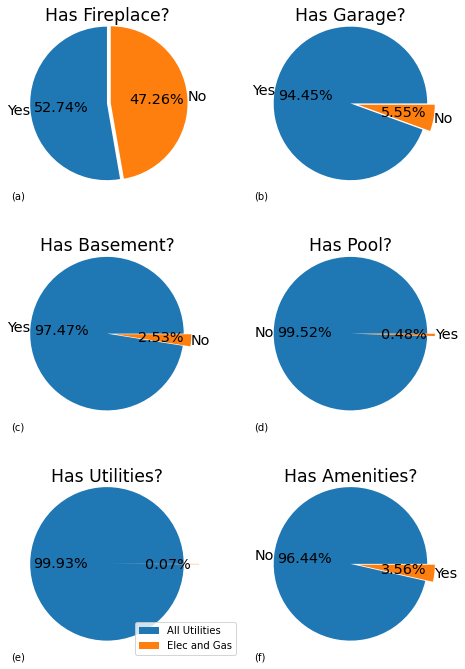

In [14]:
fig, ax = plt.subplots(figsize=(8,12), ncols=2, nrows=3)


##Fireplace
data=df_train["HasFireplace"].value_counts().values
labels=df_train["HasFireplace"].value_counts().index
explode=(0, 0.05)
ax[0,0].pie(data, explode=explode, labels=labels, labeldistance=1, autopct='%1.2f%%', pctdistance=0.6, startangle=90,textprops={'fontsize':'x-large'})
ax[0,0].set_title('Has Fireplace?', fontsize='xx-large', y=0.9);
ax[0,0].text(0,0,r'(a)',transform=ax[0,0].transAxes)


##Garage
data=df_train["HasGarage"].value_counts().values
labels=df_train["HasGarage"].value_counts().index
explode=(0, 0.1)
ax[0,1].pie(data, explode=explode, labels=labels, labeldistance=1, autopct='%1.2f%%', pctdistance=0.6, textprops={'fontsize':'x-large'})
ax[0,1].set_title('Has Garage?', fontsize='xx-large', y=0.9);
ax[0,1].text(0,0,r'(b)',transform=ax[0,1].transAxes)


##Basement
data=df_train["HasBasement"].value_counts().values
labels=df_train["HasBasement"].value_counts().index
explode=(0, 0.1)
ax[1,0].pie(data, explode=explode, labels=labels, labeldistance=1, autopct='%1.2f%%', pctdistance=0.6, textprops={'fontsize':'x-large'})
ax[1,0].set_title('Has Basement?', fontsize='xx-large', y=0.9);
ax[1,0].text(0,0,r'(c)',transform=ax[1,0].transAxes)


##Pool
data=df_train["HasPool"].value_counts().values
labels=df_train["HasPool"].value_counts().index
explode=(0, 0.1)
ax[1,1].pie(data, explode=explode, labels=labels, labeldistance=1, autopct='%1.2f%%', pctdistance=0.6, textprops={'fontsize':'x-large'})
ax[1,1].set_title('Has Pool?', fontsize='xx-large', y=0.9);
ax[1,1].text(0,0,r'(d)',transform=ax[1,1].transAxes)


##Utilities
data=df_train["Utilities"].value_counts().values
labels=df_train["Utilities"].value_counts().index
explode=(0, 0.2)
ax[2,0].pie(data, explode=explode, autopct='%1.2f%%', pctdistance=0.6, startangle=0,textprops={'fontsize':'x-large'})
ax[2,0].set_title('Has Utilities?', fontsize='xx-large', y=0.9);
ax[2,0].legend(labels=['All Utilities', 'Elec and Gas'], loc=4, bbox_to_anchor=(1.2,0))
ax[2,0].text(0,0,r'(e)',transform=ax[2,0].transAxes)


##Misc Features
data=df_train["HasAmenities"].value_counts().values
labels=df_train["HasAmenities"].value_counts().index
explode=(0, 0.1)
ax[2,1].pie(data, labels=labels, labeldistance=1, explode=explode ,autopct='%1.2f%%', pctdistance=0.6, startangle=0,textprops={'fontsize':'x-large'})
ax[2,1].set_title('Has Amenities?', fontsize='xx-large', y=0.9);
ax[2,1].text(0,0,r'(f)',transform=ax[2,1].transAxes);

#fig.savefig('B6.jpeg', dpi=1200, bbox_inches='tight')

# Block 7

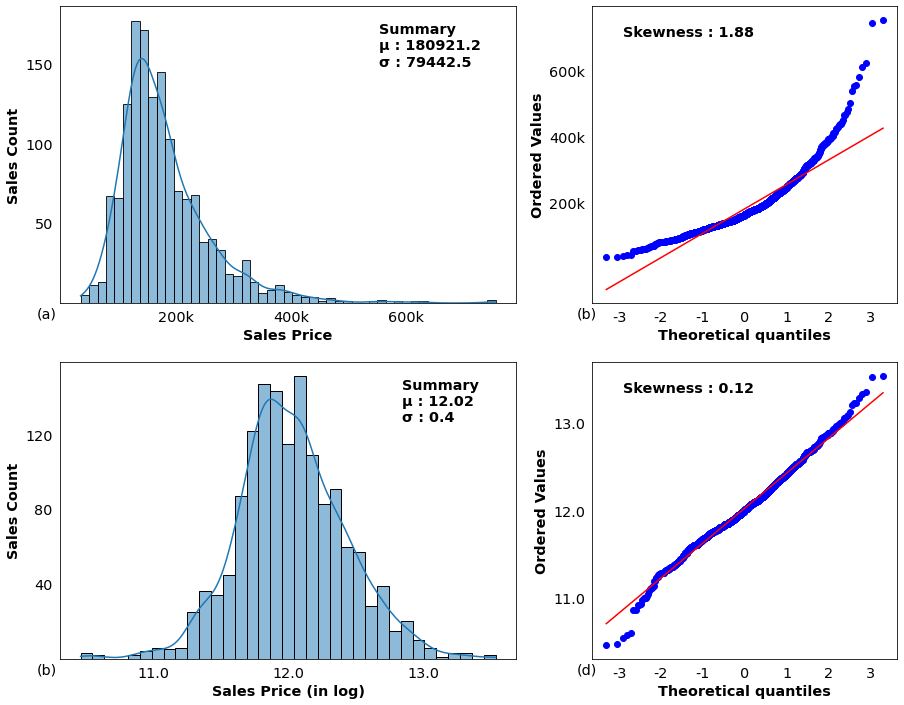

In [15]:
gs_kw=dict(width_ratios=[1.5,1])
fig, ax = plt.subplot_mosaic([['ul','ur'],['ll','lr']],
                             figsize=(15,12), gridspec_kw=gs_kw)

##SalesPrice Distribution
yticks=[50,100,150]
xticks=[200000,400000,600000]
xticklabels=['200k', '400k', '600k']
text= f'Summary\n\u03BC : {np.round(SalePrice.mean(),2)} \n\u03C3 : {np.round(SalePrice.std(),2)}'
ax['ul'].tick_params(bottom=False, left=False)
sns.histplot(SalePrice, ax=ax['ul'], kde=True);
ax['ul'].set_xticks(ticks=xticks, labels=xticklabels, fontsize='x-large')
ax['ul'].set_yticks(ticks=yticks, labels=yticks, fontsize='x-large')
ax['ul'].set_xlabel('Sales Price', fontsize='x-large', fontweight='bold')
ax['ul'].set_ylabel('Sales Count', fontsize='x-large', fontweight='bold')
ax['ul'].text(0.7,0.8, text, transform=ax['ul'].transAxes, fontsize='x-large', fontweight='bold')
ax['ul'].text(-0.05,-0.05, r'(a)', transform=ax['ul'].transAxes, fontsize='x-large')



##SalePrice QQ plot
xticks=[-3,-2,-1,0,1,2,3]
yticks=[200000,400000,600000]
yticklabels=['200k','400k','600k']
text=f'Skewness : {np.round(stats.skew(SalePrice),2)}'
ax['ur'].tick_params(bottom=False, left=False)
stats.probplot(SalePrice, plot=ax['ur']);
ax['ur'].set_xticks(ticks=xticks, labels=xticks, fontsize='x-large')
ax['ur'].set_yticks(ticks=yticks, labels=yticklabels, fontsize='x-large');
ax['ur'].set_xlabel('Theoretical quantiles', fontsize='x-large', fontweight='bold')
ax['ur'].set_ylabel('Ordered Values', fontsize='x-large', fontweight='bold')
ax['ur'].text(0.1,0.9, text, transform=ax['ur'].transAxes, fontsize='x-large', fontweight='bold')
ax['ur'].set_title('')
ax['ur'].text(-0.05,-0.05, r'(b)', transform=ax['ur'].transAxes, fontsize='x-large')



##Log SalesPrice Distribution
xticks=[11.0,12.0,13.0]
yticks=[40,80,120]
text= f'Summary\n\u03BC : {np.round(np.log(SalePrice).mean(),2)} \n\u03C3 : {np.round(np.log(SalePrice).std(),2)}'
ax['ll'].tick_params(bottom=False, left=False)
sns.histplot(np.log(SalePrice), ax=ax['ll'], kde=True);
ax['ll'].set_xticks(ticks=xticks, labels=xticks, fontsize='x-large')
ax['ll'].set_yticks(ticks=yticks, labels=yticks, fontsize='x-large')
ax['ll'].set_xlabel('Sales Price (in log)', fontsize='x-large', fontweight='bold')
ax['ll'].set_ylabel('Sales Count', fontsize='x-large', fontweight='bold')
ax['ll'].text(0.75,0.8, text, transform=ax['ll'].transAxes, fontsize='x-large', fontweight='bold')
ax['ll'].text(-0.05,-0.05, r'(b)', transform=ax['ll'].transAxes, fontsize='x-large')



##Log SalePrice QQ plot
xticks=[-3,-2,-1,0,1,2,3]
yticks=[11.0,12.0,13.0]
text=f'Skewness : {np.round(stats.skew(np.log(SalePrice)),2)}'
ax['lr'].tick_params(bottom=False, left=False)
stats.probplot(np.log(SalePrice), plot=ax['lr']);
ax['lr'].set_xticks(ticks=xticks, labels=xticks, fontsize='x-large')
ax['lr'].set_yticks(ticks=yticks, labels=yticks, fontsize='x-large');
ax['lr'].set_xlabel('Theoretical quantiles', fontsize='x-large', fontweight='bold');
ax['lr'].set_ylabel('Ordered Values', fontsize='x-large', fontweight='bold');
ax['lr'].text(0.1,0.9, text, transform=ax['lr'].transAxes, fontsize='x-large', fontweight='bold');
ax['lr'].set_title('');
ax['lr'].text(-0.05,-0.05, r'(d)', transform=ax['lr'].transAxes, fontsize='x-large');

#fig.savefig('B7.jpeg', dpi=1200, bbox_inches='tight')

# Block 8

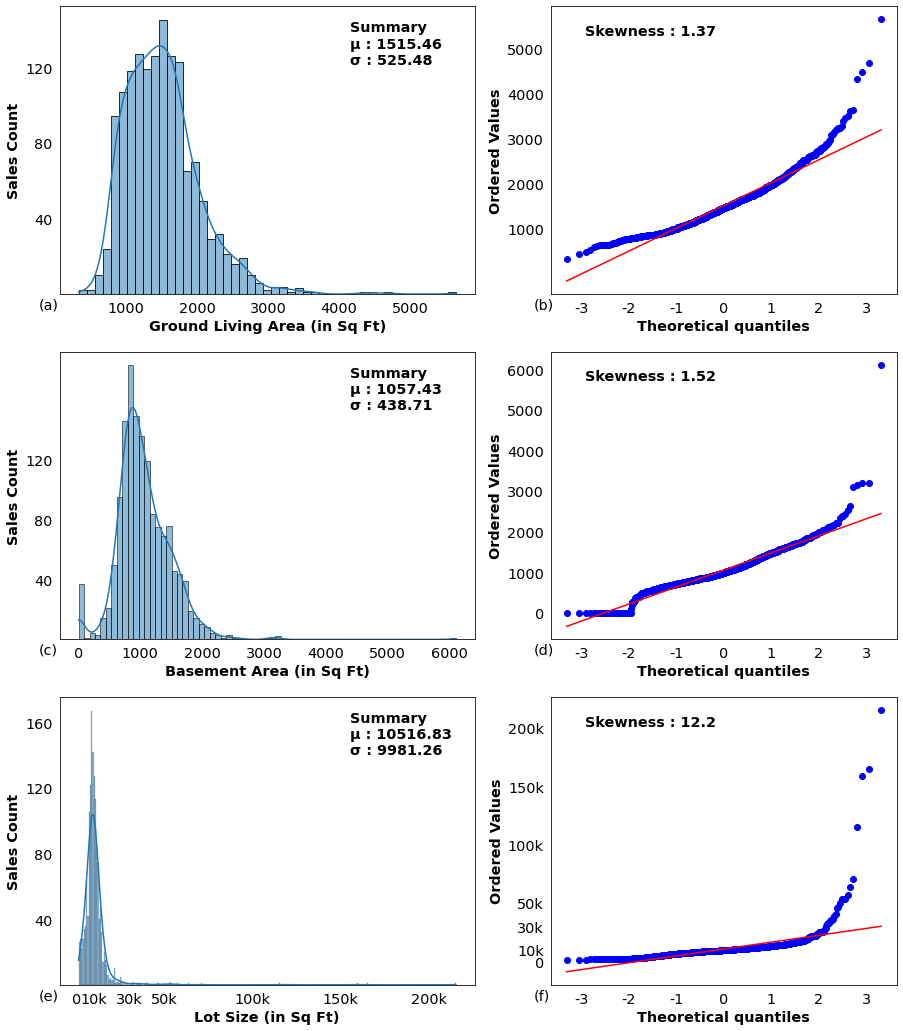

In [16]:
gs_kw=dict(width_ratios=[1.2,1])
fig, ax = plt.subplot_mosaic([['ul','ur'],['ml','mr'],['ll','lr']],
                             figsize=(15,18), gridspec_kw=gs_kw)

##Ground Living Area Distribution
data=df_train['GrLivArea']
xticks=[1000,2000,3000,4000,5000]
yticks=[40,80,120]
text= f'Summary\n\u03BC : {np.round(data.mean(),2)} \n\u03C3 : {np.round(data.std(),2)}'
ax['ul'].tick_params(bottom=False, left=False)
sns.histplot(data=data,ax=ax['ul'], kde=True);
ax['ul'].set_xticks(ticks=xticks, labels=xticks, fontsize='x-large')
ax['ul'].set_yticks(ticks=yticks, labels=yticks, fontsize='x-large')
ax['ul'].set_xlabel('Ground Living Area (in Sq Ft)', fontsize='x-large', fontweight='bold')
ax['ul'].set_ylabel('Sales Count', fontsize='x-large', fontweight='bold')
ax['ul'].text(0.7,0.8, text, transform=ax['ul'].transAxes, fontsize='x-large', fontweight='bold')
ax['ul'].text(-0.05,-0.05, r'(a)', transform=ax['ul'].transAxes, fontsize='x-large')



##Gross Living Area QQ plot
xticks=[-3,-2,-1,0,1,2,3]
yticks=[1000,2000,3000,4000,5000]
text=f'Skewness : {np.round(stats.skew(data),2)}'
ax['ur'].tick_params(bottom=False, left=False)
stats.probplot(data, plot=ax['ur']);
ax['ur'].set_xticks(ticks=xticks, labels=xticks, fontsize='x-large')
ax['ur'].set_yticks(ticks=yticks, labels=yticks, fontsize='x-large')
ax['ur'].set_xlabel('Theoretical quantiles', fontsize='x-large', fontweight='bold')
ax['ur'].set_ylabel('Ordered Values', fontsize='x-large', fontweight='bold')
ax['ur'].text(0.1,0.9, text, transform=ax['ur'].transAxes, fontsize='x-large', fontweight='bold')
ax['ur'].set_title('')
ax['ur'].text(-0.05,-0.05, r'(b)', transform=ax['ur'].transAxes, fontsize='x-large')



##Total Basement Area Distribution
data=df_train['TotalBsmtSF']
xticks=[0,1000,2000,3000,4000,5000,6000]
yticks=[40,80,120]
text= 'Summary\n\u03BC : {} \n\u03C3 : {}'.format(np.round(data.mean(),2), np.round(data.std(),2))
ax['ml'].tick_params(bottom=False, left=False)
sns.histplot(data=data,ax=ax['ml'], kde=True)
ax['ml'].set_xticks(ticks=xticks, labels=xticks, fontsize='x-large')
ax['ml'].set_yticks(ticks=yticks, labels=yticks, fontsize='x-large')
ax['ml'].set_yticks(ticks=yticks, labels=yticks)
ax['ml'].set_xlabel('Basement Area (in Sq Ft)', fontsize='x-large', fontweight='bold')
ax['ml'].set_ylabel('Sales Count', fontsize='x-large', fontweight='bold')
ax['ml'].text(0.7,0.8, text, transform=ax['ml'].transAxes, fontsize='x-large', fontweight='bold')
ax['ml'].text(-0.05,-0.05, r'(c)', transform=ax['ml'].transAxes, fontsize='x-large')



##Total Basement Area QQ plot
xticks=[-3,-2,-1,0,1,2,3]
yticks=[0,1000,2000,3000,4000,5000,6000]
text='Skewness : {}'.format(np.round(stats.skew(data),2))
ax['mr'].tick_params(bottom=False, left=False)
stats.probplot(data, plot=ax['mr'])
ax['mr'].set_xticks(ticks=xticks, labels=xticks, fontsize='x-large')
ax['mr'].set_yticks(ticks=yticks, labels=yticks, fontsize='x-large')
ax['mr'].set_xlabel('Theoretical quantiles', fontsize='x-large', fontweight='bold')
ax['mr'].set_ylabel('Ordered Values', fontsize='x-large', fontweight='bold')
ax['mr'].text(0.1,0.9, text, transform=ax['mr'].transAxes, fontsize='x-large', fontweight='bold')
ax['mr'].set_title('')
ax['mr'].text(-0.05,-0.05, r'(d)', transform=ax['mr'].transAxes, fontsize='x-large')



##Lot Area Distribution
data=df_train['LotArea']
xticks=[0,10000,30000,50000,100000,150000,200000]
xticklabels=['0','10k','30k','50k','100k','150k','200k']
yticks=[40,80,120,160]
text= 'Summary\n\u03BC : {} \n\u03C3 : {}'.format(np.round(data.mean(),2), np.round(data.std(),2))
ax['ll'].tick_params(bottom=False, left=False)
sns.histplot(data=data,ax=ax['ll'], kde=True);
ax['ll'].set_xticks(ticks=xticks, labels=xticklabels, fontsize='x-large')
ax['ll'].set_yticks(ticks=yticks, labels=yticks, fontsize='x-large')
ax['ll'].set_xlabel('Lot Size (in Sq Ft)', fontsize='x-large', fontweight='bold')
ax['ll'].set_ylabel('Sales Count', fontsize='x-large', fontweight='bold')
ax['ll'].text(0.7,0.8, text, transform=ax['ll'].transAxes, fontsize='x-large', fontweight='bold')
ax['ll'].text(-0.05,-0.05, r'(e)', transform=ax['ll'].transAxes, fontsize='x-large');



##Lot Area QQ plot
xticks=[-3,-2,-1,0,1,2,3]
yticks=[0,10000,30000,50000,100000,150000,200000]
yticklabels=['0','10k','30k','50k','100k','150k','200k']
text='Skewness : {}'.format(np.round(stats.skew(data),2))
ax['lr'].tick_params(bottom=False, left=False)
stats.probplot(data, plot=ax['lr'])
ax['lr'].set_xticks(ticks=xticks, labels=xticks, fontsize='x-large')
ax['lr'].set_yticks(ticks=yticks, labels=yticklabels, fontsize='x-large')
ax['lr'].set_xlabel('Theoretical quantiles', fontsize='x-large', fontweight='bold')
ax['lr'].set_ylabel('Ordered Values', fontsize='x-large', fontweight='bold')
ax['lr'].text(0.1,0.9, text, transform=ax['lr'].transAxes, fontsize='x-large', fontweight='bold')
ax['lr'].set_title('')
ax['lr'].text(-0.05,-0.05, r'(f)', transform=ax['lr'].transAxes, fontsize='x-large');

#fig.savefig('B8.jpeg', dpi=1200, bbox_inches='tight')

# Block 9

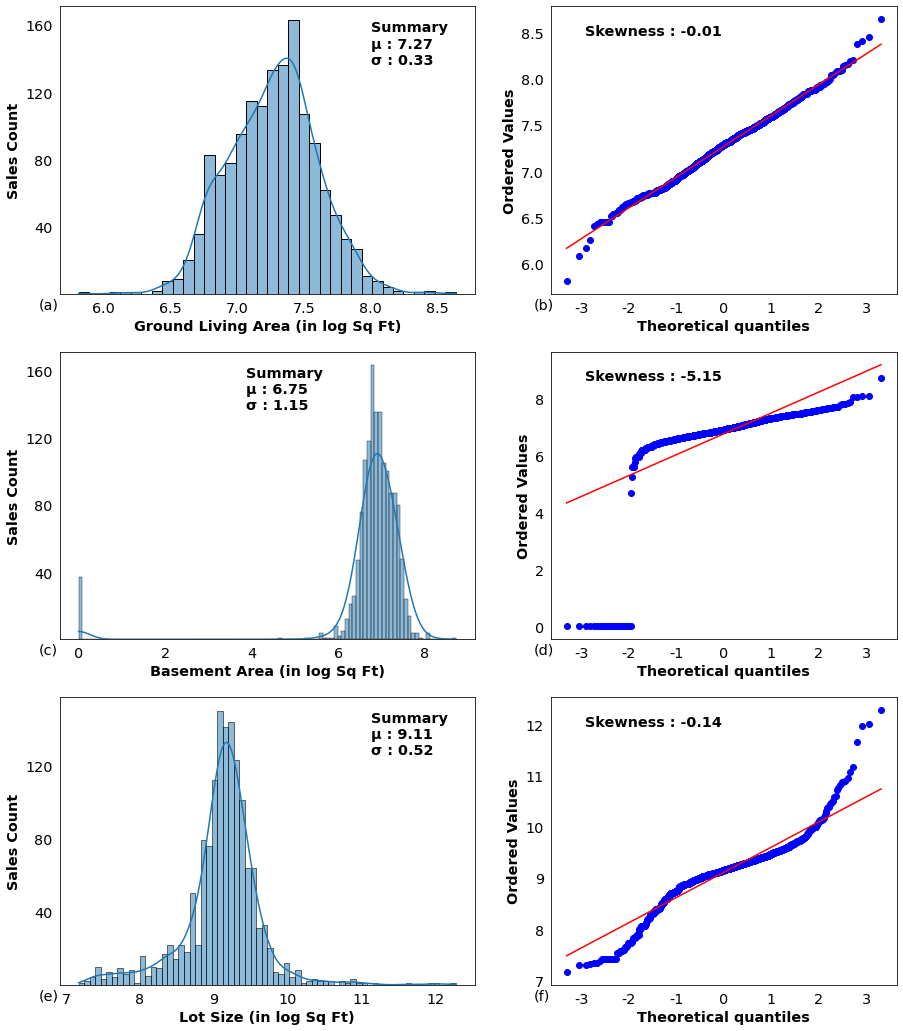

In [17]:
gs_kw=dict(width_ratios=[1.2,1])
fig, ax = plt.subplot_mosaic([['ul','ur'],['ml','mr'],['ll','lr']],
                             figsize=(15,18), gridspec_kw=gs_kw)

##Ground Living Area Distribution
data=np.log1p(df_train['GrLivArea'])
xticks=[6.0,6.5,7.0,7.5,8.0,8.5]
yticks=[40,80,120,160]
text= f'Summary\n\u03BC : {np.round(data.mean(),2)} \n\u03C3 : {np.round(data.std(),2)}'
ax['ul'].tick_params(bottom=False, left=False)
sns.histplot(data=data,ax=ax['ul'], kde=True);
ax['ul'].set_xticks(ticks=xticks, labels=xticks, fontsize='x-large')
ax['ul'].set_yticks(ticks=yticks, labels=yticks, fontsize='x-large')
ax['ul'].set_xlabel('Ground Living Area (in log Sq Ft)', fontsize='x-large', fontweight='bold')
ax['ul'].set_ylabel('Sales Count', fontsize='x-large', fontweight='bold')
ax['ul'].text(0.75,0.8, text, transform=ax['ul'].transAxes, fontsize='x-large', fontweight='bold')
ax['ul'].text(-0.05,-0.05, r'(a)', transform=ax['ul'].transAxes, fontsize='x-large')



##Gross Living Area QQ plot
xticks=[-3,-2,-1,0,1,2,3]
yticks=[6.0,6.5,7.0,7.5,8.0,8.5]
text=f'Skewness : {np.round(stats.skew(data),2)}'
ax['ur'].tick_params(bottom=False, left=False)
stats.probplot(data, plot=ax['ur']);
ax['ur'].set_xticks(ticks=xticks, labels=xticks, fontsize='x-large')
ax['ur'].set_yticks(ticks=yticks, labels=yticks, fontsize='x-large')
ax['ur'].set_xlabel('Theoretical quantiles', fontsize='x-large', fontweight='bold')
ax['ur'].set_ylabel('Ordered Values', fontsize='x-large', fontweight='bold')
ax['ur'].text(0.1,0.9, text, transform=ax['ur'].transAxes, fontsize='x-large', fontweight='bold')
ax['ur'].set_title('')
ax['ur'].text(-0.05,-0.05, r'(b)', transform=ax['ur'].transAxes, fontsize='x-large')



##Total Basement Area Distribution
data=np.log1p(df_train['TotalBsmtSF'])
xticks=[0,2,4,6,8]
yticks=[40,80,120,160]
text= 'Summary\n\u03BC : {} \n\u03C3 : {}'.format(np.round(data.mean(),2), np.round(data.std(),2))
ax['ml'].tick_params(bottom=False, left=False)
sns.histplot(data=data,ax=ax['ml'], kde=True)
ax['ml'].set_xticks(ticks=xticks, labels=xticks, fontsize='x-large')
ax['ml'].set_yticks(ticks=yticks, labels=yticks, fontsize='x-large')
ax['ml'].set_xlabel('Basement Area (in log Sq Ft)', fontsize='x-large', fontweight='bold')
ax['ml'].set_ylabel('Sales Count', fontsize='x-large', fontweight='bold')
ax['ml'].text(0.45,0.8, text, transform=ax['ml'].transAxes, fontsize='x-large', fontweight='bold')
ax['ml'].text(-0.05,-0.05, r'(c)', transform=ax['ml'].transAxes, fontsize='x-large')



##Total Basement Area QQ plot
xticks=[-3,-2,-1,0,1,2,3]
yticks=[0,2,4,6,8]
text='Skewness : {}'.format(np.round(stats.skew(data),2))
ax['mr'].tick_params(bottom=False, left=False)
stats.probplot(data, plot=ax['mr'])
ax['mr'].set_xticks(ticks=xticks, labels=xticks, fontsize='x-large')
ax['mr'].set_yticks(ticks=yticks, labels=yticks, fontsize='x-large')
ax['mr'].set_xlabel('Theoretical quantiles', fontsize='x-large', fontweight='bold')
ax['mr'].set_ylabel('Ordered Values', fontsize='x-large', fontweight='bold')
ax['mr'].text(0.1,0.9, text, transform=ax['mr'].transAxes, fontsize='x-large', fontweight='bold')
ax['mr'].set_title('')
ax['mr'].text(-0.05,-0.05, r'(d)', transform=ax['mr'].transAxes, fontsize='x-large')



##Lot Area Distribution
data=np.log1p(df_train['LotArea'])
xticks=[7,8,9,10,11,12]
yticks=[40,80,120]
text= 'Summary\n\u03BC : {} \n\u03C3 : {}'.format(np.round(data.mean(),2), np.round(data.std(),2))
ax['ll'].tick_params(bottom=False, left=False)
sns.histplot(data=data,ax=ax['ll'], kde=True)
ax['ll'].set_xticks(ticks=xticks, labels=xticks, fontsize='x-large')
ax['ll'].set_yticks(ticks=yticks, labels=yticks, fontsize='x-large')
ax['ll'].set_yticks(ticks=yticks, labels=yticks)
ax['ll'].set_xlabel('Lot Size (in log Sq Ft)', fontsize='x-large', fontweight='bold')
ax['ll'].set_ylabel('Sales Count', fontsize='x-large', fontweight='bold')
ax['ll'].text(0.75,0.8, text, transform=ax['ll'].transAxes, fontsize='x-large', fontweight='bold')
ax['ll'].text(-0.05,-0.05, r'(e)', transform=ax['ll'].transAxes, fontsize='x-large')



##Lot Area QQ plot
xticks=[-3,-2,-1,0,1,2,3]
yticks=[7,8,9,10,11,12]
text='Skewness : {}'.format(np.round(stats.skew(data),2))
ax['lr'].tick_params(bottom=False, left=False)
stats.probplot(data, plot=ax['lr'])
ax['lr'].set_xticks(ticks=xticks, labels=xticks, fontsize='x-large')
ax['lr'].set_yticks(ticks=yticks, labels=yticks, fontsize='x-large')
ax['lr'].set_xlabel('Theoretical quantiles', fontsize='x-large', fontweight='bold')
ax['lr'].set_ylabel('Ordered Values', fontsize='x-large', fontweight='bold')
ax['lr'].text(0.1,0.9, text, transform=ax['lr'].transAxes, fontsize='x-large', fontweight='bold')
ax['lr'].set_title('')
ax['lr'].text(-0.05,-0.05, r'(f)', transform=ax['lr'].transAxes, fontsize='x-large')

plt.show()
#fig.savefig('B9.jpeg', dpi=1200, bbox_inches='tight')

# Block 10

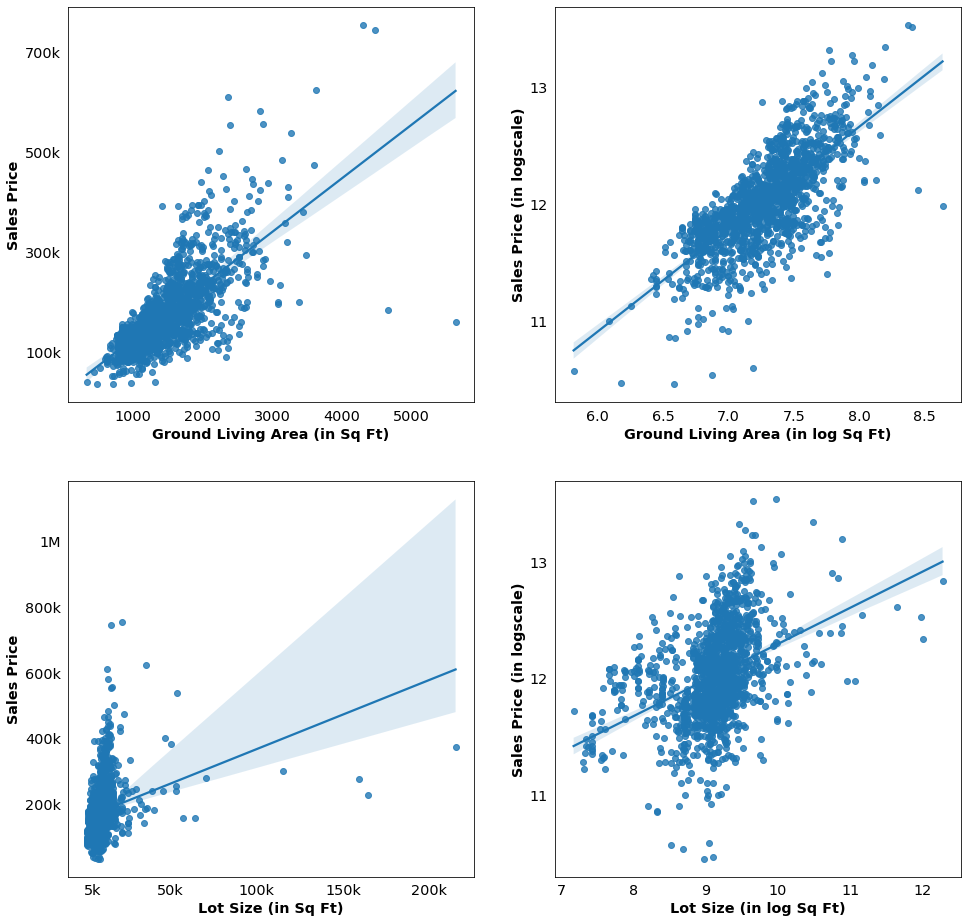

In [18]:
fig, ax=plt.subplots(figsize=(16,16), ncols=2, nrows=2)


##Sales Price vs Ground Living Area relation
xticks=[1000,2000,3000,4000,5000]
yticks=[100000,300000,500000,700000]
yticklabels=['100k','300k','500k','700k']
ax[0,0].tick_params(bottom=False, left=False)
sns.regplot(data=df_train, x='GrLivArea', y='SalePrice', ax=ax[0,0])
ax[0,0].set_xticks(ticks=xticks, labels=xticks, fontsize='x-large')
ax[0,0].set_yticks(ticks=yticks, labels=yticklabels, fontsize='x-large')
ax[0,0].set_xlabel('Ground Living Area (in Sq Ft)', fontsize='x-large', fontweight='bold')
ax[0,0].set_ylabel('Sales Price', fontsize='x-large', fontweight='bold')

##Sales Price vs Ground Living Area relation in log scale
xticks=[6.0,6.5,7.0,7.5,8.0,8.5]
yticks=[11,12,13]
data=pd.DataFrame()
data['GrLivArea']=np.log1p(df_train['GrLivArea'])
data['SalePrice']=np.log1p(df_train['SalePrice'])
ax[0,1].tick_params(bottom=False, left=False)
sns.regplot(data=data, x='GrLivArea', y='SalePrice', ax=ax[0,1])
ax[0,1].set_xticks(ticks=xticks, labels=xticks, fontsize='x-large')
ax[0,1].set_yticks(ticks=yticks, labels=yticks, fontsize='x-large')
ax[0,1].set_xlabel('Ground Living Area (in log Sq Ft)', fontsize='x-large', fontweight='bold')
ax[0,1].set_ylabel('Sales Price (in logscale)', fontsize='x-large', fontweight='bold')



##Sales Price vs Lot Size relation
xticks=[5000,50000,100000,150000,200000]
yticks=[200000,400000,600000,800000, 1000000]
xticklabels=['5k','50k','100k','150k','200k']
yticklabels=['200k','400k','600k','800k', '1M']
ax[1,0].tick_params(bottom=False, left=False)
sns.regplot(data=df_train, x='LotArea', y='SalePrice', ax=ax[1,0])
ax[1,0].set_xticks(ticks=xticks, labels=xticklabels, fontsize='x-large')
ax[1,0].set_yticks(ticks=yticks, labels=yticklabels, fontsize='x-large')
ax[1,0].set_xlabel('Lot Size (in Sq Ft)', fontsize='x-large', fontweight='bold')
ax[1,0].set_ylabel('Sales Price', fontsize='x-large', fontweight='bold')


##Sales Price vs Lot Size relation in log scale
xticks=[7,8,9,10,11,12]
yticks=[11,12,13]
data=pd.DataFrame()
data['LotArea']=np.log1p(df_train['LotArea'])
data['SalePrice']=np.log1p(df_train['SalePrice'])
ax[1,1].tick_params(bottom=False, left=False)
sns.regplot(data=data, x='LotArea', y='SalePrice', ax=ax[1,1])
ax[1,1].set_xticks(ticks=xticks, labels=xticks, fontsize='x-large')
ax[1,1].set_yticks(ticks=yticks, labels=yticks, fontsize='x-large')
ax[1,1].set_xlabel('Lot Size (in log Sq Ft)', fontsize='x-large', fontweight='bold')
ax[1,1].set_ylabel('Sales Price (in logscale)', fontsize='x-large', fontweight='bold')

plt.show()

#fig.savefig('B10.jpeg', dpi=1200, bbox_inches='tight')

# Block 11

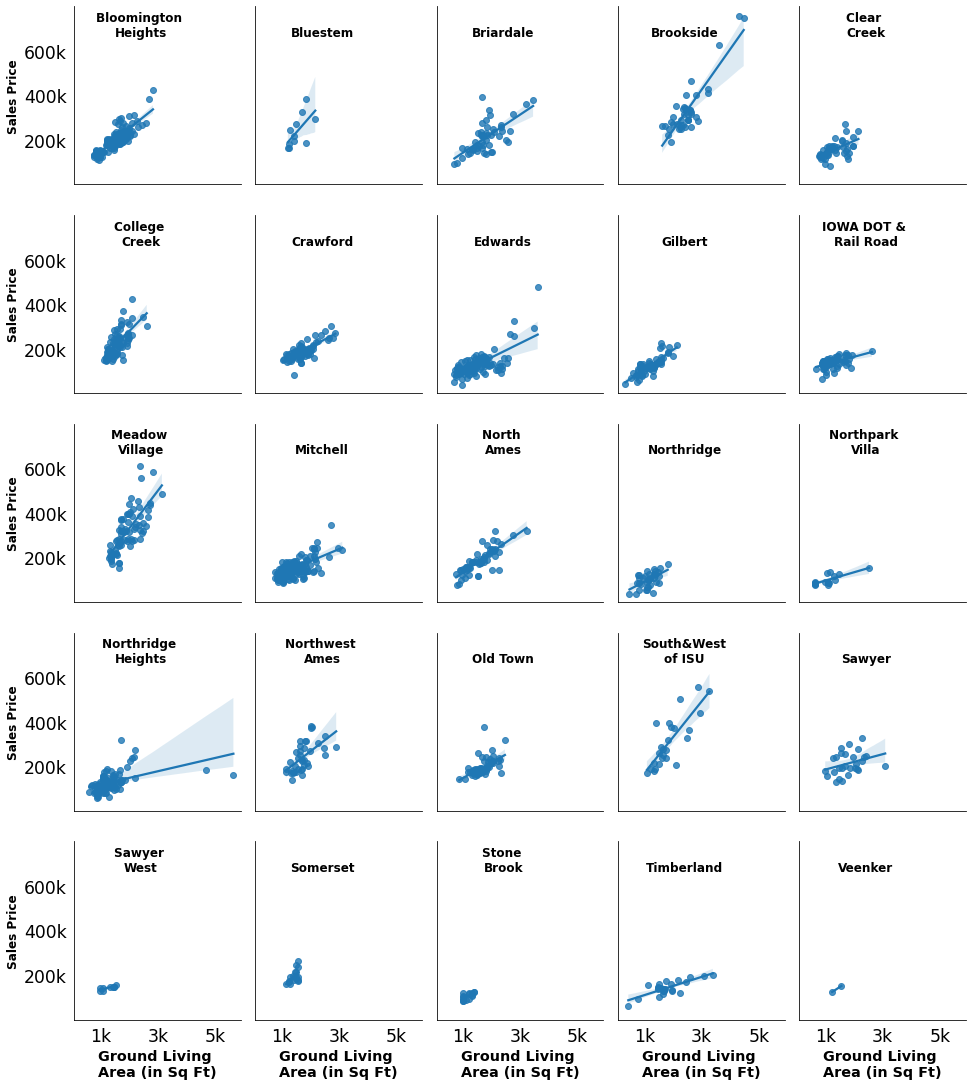

In [19]:
data=df_train
fig=sns.lmplot(data=data, x='GrLivArea', y='SalePrice', col='Neighborhood', col_wrap=5, height=3, aspect=0.9)
titles=['Bloomington \nHeights',
        'Bluestem', 
        'Briardale',
        'Brookside',
        'Clear \nCreek',
        'College \nCreek',
        'Crawford',
        'Edwards',
        'Gilbert',
        'IOWA DOT & \nRail Road',
        'Meadow \nVillage',
        'Mitchell',
        'North \nAmes',
        'Northridge',
        'Northpark \nVilla',
        'Northridge \nHeights',
        'Northwest \nAmes',
        'Old Town',
        'South&West\nof ISU',
        'Sawyer',
        'Sawyer \nWest',
        'Somerset',
        'Stone \nBrook',
        'Timberland',
        'Veenker']
xticks=[1000, 3000, 5000]
xticklabels=['1k','3k','5k']
yticks=[200000,400000,600000]
yticklabels=['200k','400k','600k']
for i in fig.axes:
    i.tick_params(axis='both', which='both', bottom=False, left=False)
    i.set_xlabel("Ground Living \nArea (in Sq Ft)", fontsize='x-large', fontstretch='semi-expanded', fontweight='bold')
    i.set_xticks(ticks=xticks, labels=xticklabels, fontsize='xx-large')
    i.set_ylim(0,800000)
    i.set_yticks(ticks=yticks, labels=yticklabels, fontsize='xx-large')
    i.set_ylabel("Sales Price", fontsize='large', fontweight='bold')
    i.set_title(titles[list(fig.axes).index(i)],fontsize='large', fontweight='bold', x=0.4, y=0.8)

plt.show()
#fig.savefig('B11.jpeg', dpi=1200, bbox_inches='tight')

# Block 12

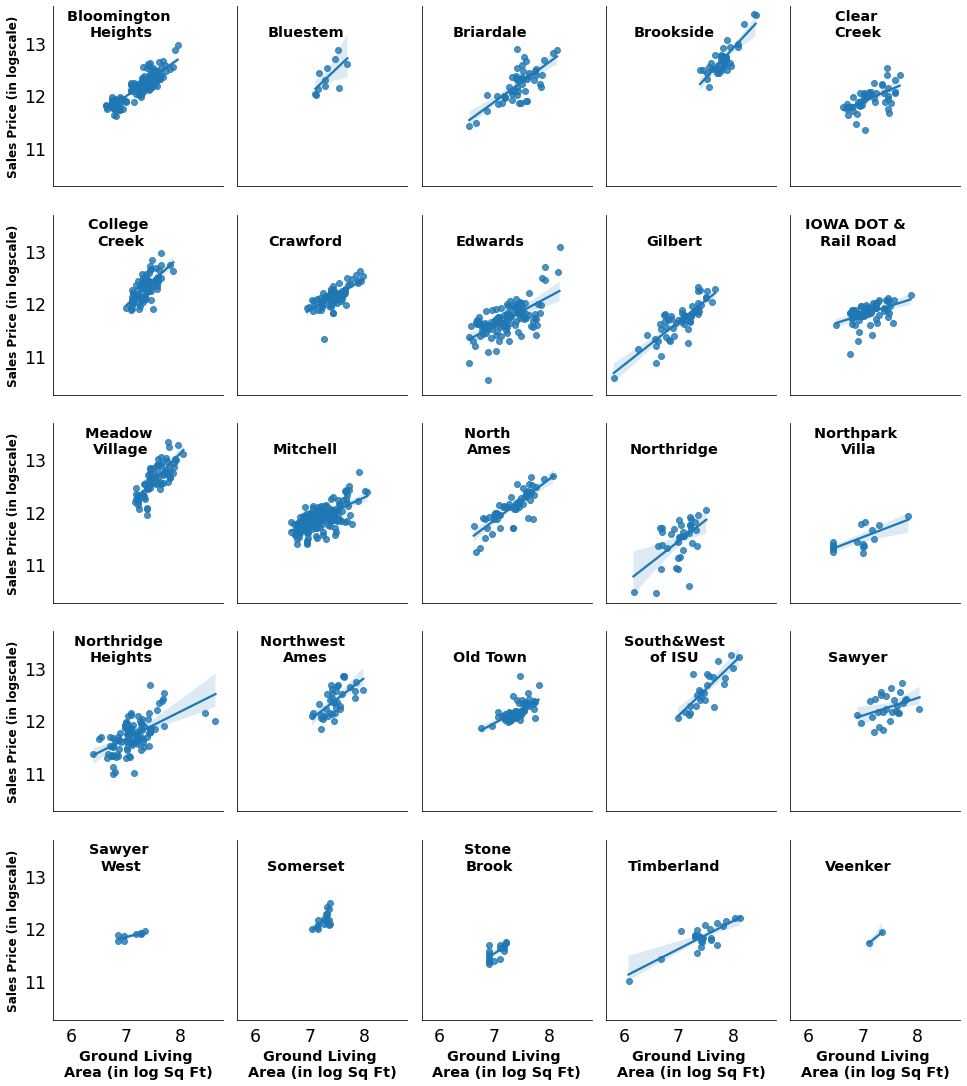

In [20]:
data=pd.DataFrame()
data['GrLivArea']=np.log1p(df_train['GrLivArea'])
data['SalePrice']=np.log1p(df_train['SalePrice'])
data['Neighborhood']=df_train['Neighborhood']
fig=sns.lmplot(data=data, x='GrLivArea', y='SalePrice', col='Neighborhood', col_wrap=5, height=3, aspect=0.9)
titles=['Bloomington \nHeights',
        'Bluestem', 
        'Briardale',
        'Brookside',
        'Clear \nCreek',
        'College \nCreek',
        'Crawford',
        'Edwards',
        'Gilbert',
        'IOWA DOT & \nRail Road',
        'Meadow \nVillage',
        'Mitchell',
        'North \nAmes',
        'Northridge',
        'Northpark \nVilla',
        'Northridge \nHeights',
        'Northwest \nAmes',
        'Old Town',
        'South&West\nof ISU',
        'Sawyer',
        'Sawyer \nWest',
        'Somerset',
        'Stone \nBrook',
        'Timberland',
        'Veenker']
xticks=[6, 7, 8]
yticks=[11,12,13]
for i in fig.axes:
    i.tick_params(axis='both', which='both', bottom=False, left=False)
    i.set_xlabel("Ground Living \nArea (in log Sq Ft)", fontsize='x-large', fontstretch='semi-expanded', fontweight='bold')
    i.set_xticks(ticks=xticks, labels=xticks, fontsize='xx-large')
    i.set_yticks(ticks=yticks, labels=yticks, fontsize='xx-large')
    i.set_ylabel("Sales Price (in logscale)", fontsize='large', fontweight='bold')
    i.set_title(titles[list(fig.axes).index(i)],fontsize='x-large', fontweight='bold', x=0.4, y=0.8)

plt.show()
#fig.savefig('B12.jpeg', dpi=1200, bbox_inches='tight')